In [2]:
import pandas as pd    
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
df = pd.read_csv("StudentsPerformance_modified.csv")  

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [5]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [6]:
df.shape

(1000, 8)

In [7]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [8]:
df.rename(columns={'math score':'Math_score'}, inplace=True)

In [9]:
df['Math_score'].unique()

array(['72', '69', '90', '47', '76', '71', '88', '40', '64', '38', '58',
       '65', '78', '50', nan, '74', '73', '67', '70', '62', '63', '56',
       '81', '75', '57', '55', '53', '59', '66', '82', '77', '33', '52',
       '0', '79', '39', '45', '60', '61', '41', '49', '44', '30', '80',
       '42', '27', '43', '68', '85', '98', '87', '54', '51', '99', '84',
       '91', '83', '89', '22', '100', '96', '94', '46', '97', '48', '35',
       '34', '86', '92', '37', '28', '24', '113', '123', '?', '-89', '26',
       '334', '95', '36', '29', '32', '93', '19', '23', '8'], dtype=object)

In [11]:
df = df.replace('?', np.nan)

In [14]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
Math_score                     43
reading score                   6
writing score                   9
dtype: int64

In [17]:
# 1)
df['math score'] = pd.to_numeric(df['Math_score'], errors='coerce')  # converting to numeric
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
Math_score                      object
reading score                  float64
writing score                  float64
math score                     float64
dtype: object

In [18]:
# finding means 
meanMathScore = df['math score'].mean()
meanRScore = df['reading score'].mean()
meanWScore = df['writing score'].mean()
print("Mean math score - " + str(meanMathScore))
print("Mean math score - " + str(meanRScore))
print("Mean math score - " + str(meanWScore))

Mean math score - 66.3239289446186
Mean math score - 68.00804828973843
Mean math score - 69.48738647830474


In [19]:
# filling up nan values
df['math score'].fillna(value=meanMathScore,inplace=True) # replacing null values with mean of the column
df['reading score'].fillna(value=meanRScore,inplace=True) # replacing null values with mean of the column
df['writing score'].fillna(value=meanWScore,inplace=True) # replacing null values with mean of the column

# check if null values remain
print(df['math score'].isnull().sum())
print(df['reading score'].isnull().sum())
print(df['writing score'].isnull().sum())

0
0
0


In [20]:
import seaborn as sns

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

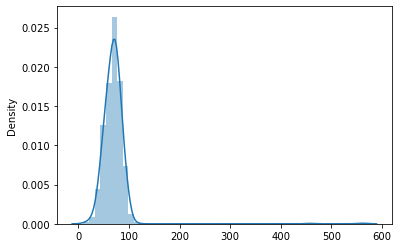

In [22]:
sns.distplot(df[["writing score"]])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

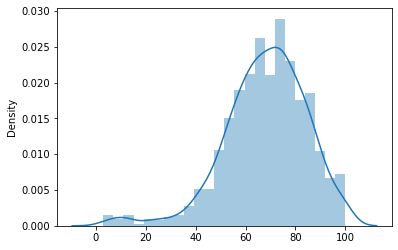

In [23]:
sns.distplot(df[["reading score"]])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

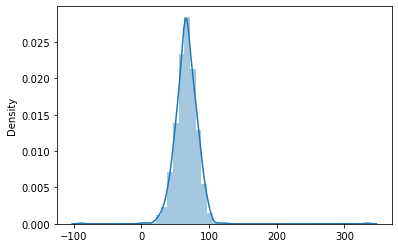

In [24]:
sns.distplot(df[["math score"]])

In [32]:
df['math score'].unique()

array([ 72.        ,  69.        ,  90.        ,  47.        ,
        76.        ,  71.        ,  88.        ,  40.        ,
        64.        ,  38.        ,  58.        ,  65.        ,
        78.        ,  50.        ,  66.32392894,  74.        ,
        73.        ,  67.        ,  70.        ,  62.        ,
        63.        ,  56.        ,  81.        ,  75.        ,
        57.        ,  55.        ,  53.        ,  59.        ,
        66.        ,  82.        ,  77.        ,  33.        ,
        52.        ,   0.        ,  79.        ,  39.        ,
        45.        ,  60.        ,  61.        ,  41.        ,
        49.        ,  44.        ,  30.        ,  80.        ,
        42.        ,  27.        ,  43.        ,  68.        ,
        85.        ,  98.        ,  87.        ,  54.        ,
        66.32590666,  99.        ,  84.        ,  51.        ,
        91.        ,  83.        ,  89.        ,  22.        ,
       100.        ,  96.        ,  94.        ,  46.  

In [33]:
for col in df.select_dtypes(include=['int64', 'float64']):
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    outliers = abs(df[col]-median)>(std*3)
    df[col][outliers] = np.nan
df.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_1516/3413242318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers] = np.nan


gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
Math_score                     43
reading score                  17
writing score                   3
math score                      5
dtype: int64

In [34]:
for col in df.select_dtypes(include=['int64', 'float64']):
    df[col].fillna(value=df[col].mean(), inplace=True)

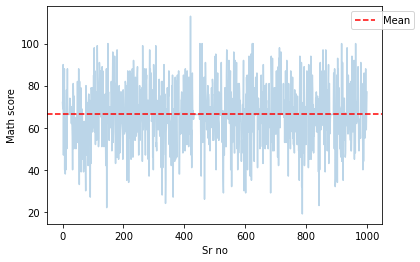

In [35]:
x=df['math score']
plt.plot(x, alpha=0.3)
plt.axhline(y = df['math score'].mean(), color = 'r', linestyle = '--', label="Mean")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')
plt.xlabel('Sr no')
plt.ylabel('Math score')
plt.show()

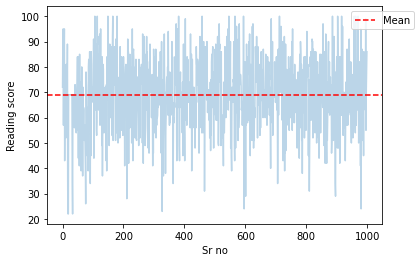

In [36]:
x=df['reading score']
plt.plot(x, alpha=0.3)
plt.axhline(y = df['reading score'].mean(), color = 'r', linestyle = '--', label="Mean")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')
plt.xlabel('Sr no')
plt.ylabel('Reading score')
plt.show()

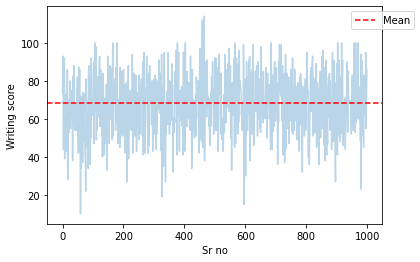

In [37]:
x=df['writing score']
plt.plot(x, alpha=0.3)
plt.axhline(y = df['writing score'].mean(), color = 'r', linestyle = '--', label="Mean")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')
plt.xlabel('Sr no')
plt.ylabel('Writing score')
plt.show()

In [38]:
df_new = df.copy()

In [42]:
from sklearn.preprocessing import MinMaxScaler
  
# apply normalization techniques
scaler = MinMaxScaler()
columns_new = ['math score', 'reading score', 'writing score']
df_new1 = scaler.fit_transform(df_new[columns_new].to_numpy())
df_new1 = pd.DataFrame(df_new1, columns=columns_new)
 
print("Scaled Dataset")
df_new1.head()

Scaled Dataset


,math score,reading score,writing score
0,0.563830,0.641026,0.615385
1,0.531915,0.871795,0.750000
2,0.755319,0.935897,0.798077
3,0.297872,0.448718,0.326923
4,0.606383,0.717949,0.625000


In [44]:
from sklearn.preprocessing import StandardScaler
 
standard_scale = StandardScaler()
columns_new1 = ['math score', 'reading score', 'writing score']
df_new2 = standard_scale.fit_transform(df_new[columns_new1].to_numpy())
df_new2 = pd.DataFrame(df_new2, columns=columns_new1)
 
print("Scaled Dataset with StandardScaler")
df_new2.head()

Scaled Dataset with StandardScaler


,math score,reading score,writing score
0,0.392627,0.203599,0.385876
1,0.186656,1.433133,1.309570
2,1.628449,1.774670,1.639460
3,-1.323793,-0.821013,-1.593468
4,0.667254,0.613443,0.451854
